In [2]:
from collections import namedtuple, defaultdict
from typing import NamedTuple
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 300



Result = namedtuple('Result', ['partisans', "sims"])
Sim = NamedTuple("Sim", [("mean_t_diff", int)])

In [3]:
fname = 'output/bigexperiment-2022_10_06-20_34_14.log'

In [4]:
import json
results_by_m = defaultdict(list[Sim])

rows = []
with open('../' + fname, 'r') as f:
    for line in f:
        d = json.loads(line)

        rows.append(d)
        results_by_m[d['m']].append(Sim(d['mean_t_diff']))

results = [Result(k, v) for k, v in results_by_m.items()]
# results.sort(key=lambda x: x.partisans)

df = pd.DataFrame(rows).sort_values(by='m')
df

,m,mean_t_diff,run
0,1,420.269103,6
72,1,2594.719551,55
71,1,377.386100,76
70,1,753.586511,71
69,1,681.935065,75
...,...,...,...
9827,99,33.854954,26
9826,99,-17.610119,28
9824,99,-25.439405,25
9835,99,139.946809,24


In [5]:
def find_min_max(x):
    return min(x), max(x)

In [11]:
df_m = df.groupby("m")
df_m.mean().head(20)

,mean_t_diff,run
m,,
1,853.068226,49.5
2,703.490931,49.5
3,605.514547,49.5
4,435.126288,49.5
5,326.536985,49.5
6,285.586950,49.5
7,219.850671,49.5
8,126.642362,49.5
9,112.092376,49.5


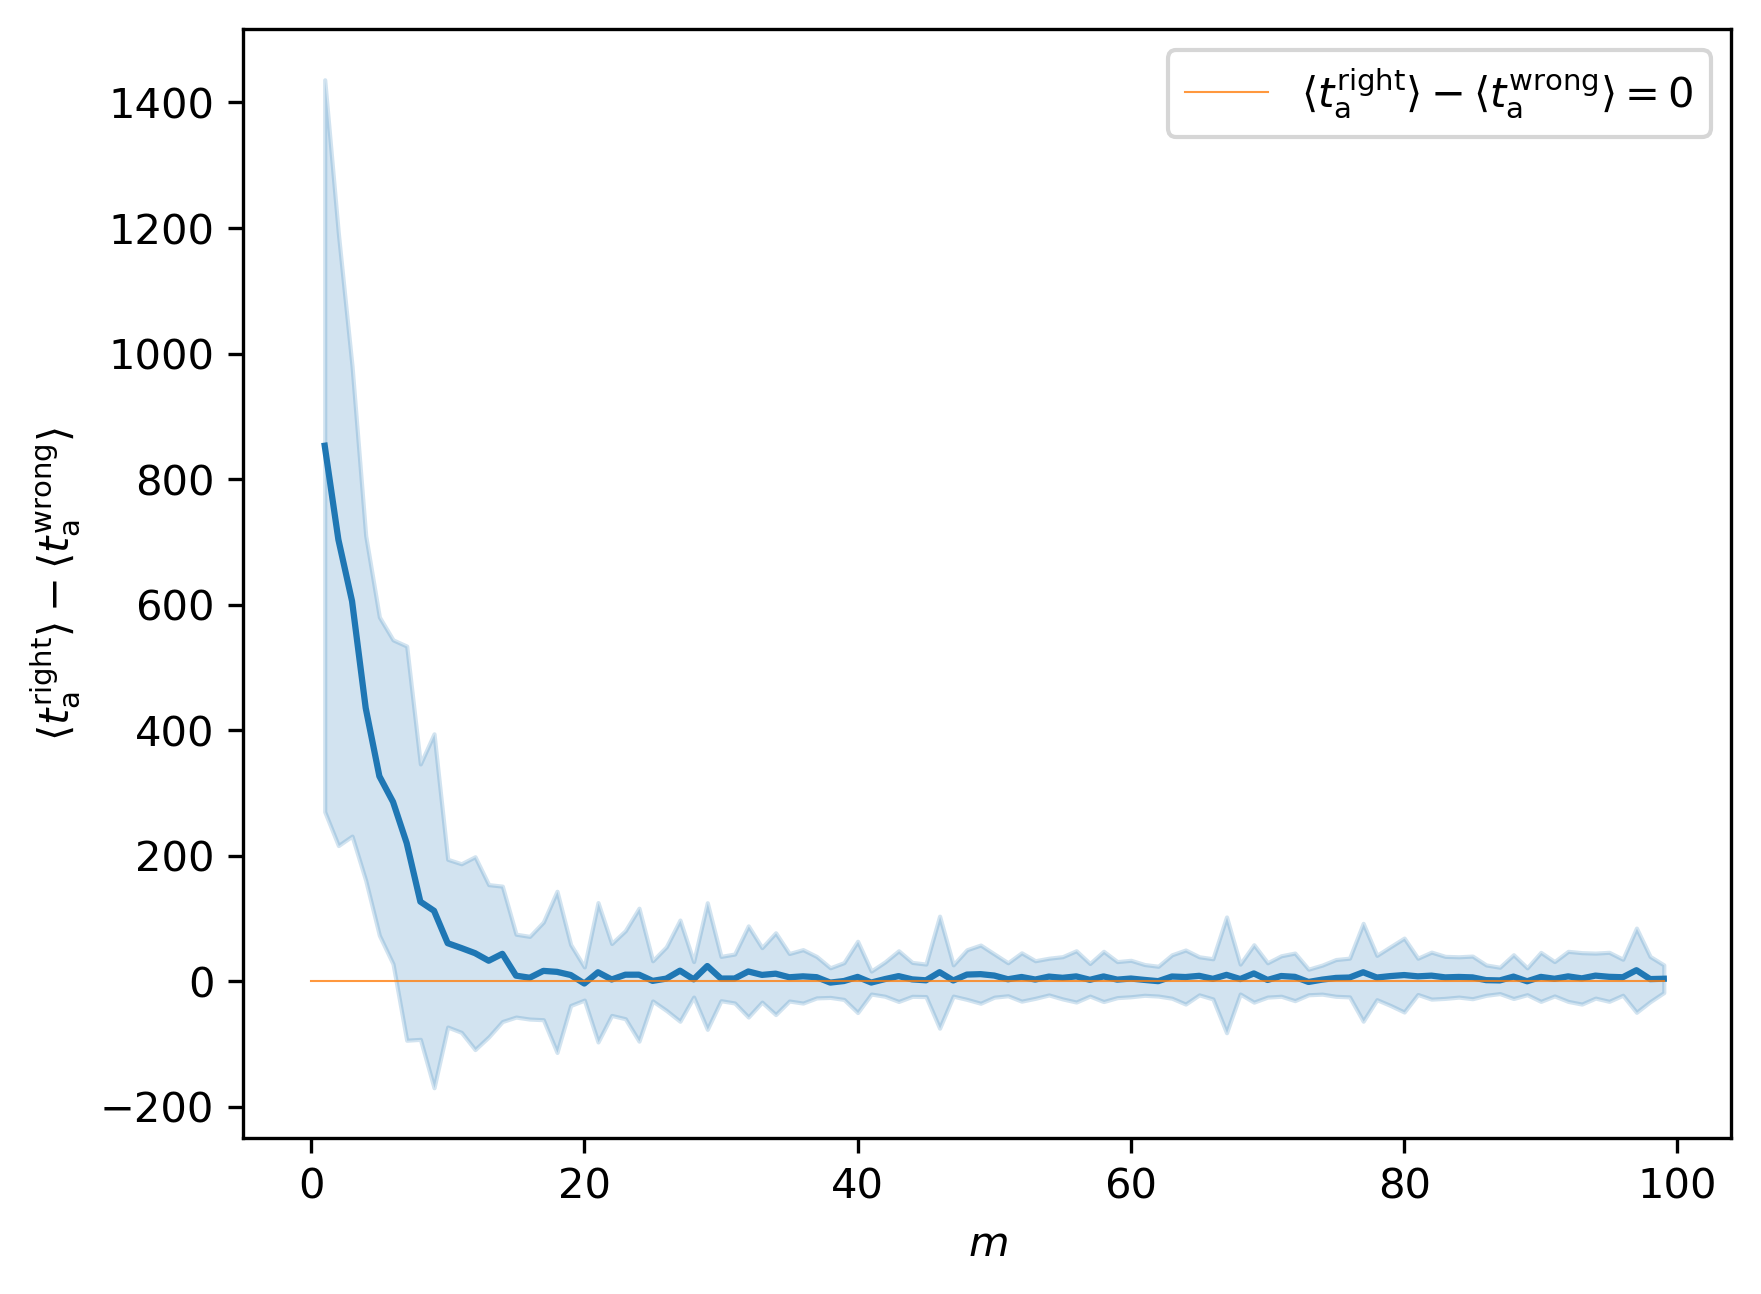

In [71]:

sns.lineplot(data=df, x='m', y='mean_t_diff',errorbar="sd")
# plt.yscale('log')
plt.plot([0]*100,alpha= 0.8,linewidth=0.5,label= "$\\langle t_{\\rm a}^{\\rm right} \\rangle - \\langle t_{\\rm a}^{\\rm wrong} \\rangle =0$")
plt.ylabel("$\\langle t_{\\rm a}^{\\rm right} \\rangle - \\langle t_{\\rm a}^{\\rm wrong} \\rangle$")
plt.xlabel("$m$")
plt.legend()

In [17]:
import json
results_by_partisan = defaultdict(list[Sim])

rows = []
with open('../' + fname, 'r') as f:
    for line in f:
        d = json.loads(line)

        rows.append(d)
        results_by_partisan[d['partisans']].append(Sim(d['mean_t_diff']))

results = [Result(k, v) for k, v in results_by_partisan.items()]
results.sort(key=lambda x: x.partisans)

df = pd.DataFrame(rows)
df.describe()

,partisans,mean_t_diff,run
count,100.000000,99.000000,100.0
mean,0.495000,111.132706,0.0
std,0.290115,153.797077,0.0
min,0.000000,-17.196286,0.0
25%,0.247500,24.161164,0.0
50%,0.495000,63.766304,0.0
75%,0.742500,124.499136,0.0
max,0.990000,961.606061,0.0


In [18]:
df

,partisans,mean_t_diff,run
0,0.01,48.911111,0
1,0.00,15.664964,0
2,0.05,-7.928571,0
3,0.04,-12.927711,0
4,0.03,6.875000,0
...,...,...,...
95,0.94,369.804124,0
96,0.92,338.213058,0
97,0.97,675.101010,0
98,0.98,961.606061,0


In [21]:
df.groupby('partisans').mean_t_diff.mean().to_frame()

,mean_t_diff
partisans,
0.00,15.664964
0.01,48.911111
0.02,117.695652
0.03,6.875000
0.04,-12.927711
...,...
0.95,396.489796
0.96,356.846939
0.97,675.101010
